In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import zipfile
import io
from geotext import GeoText
from fuzzywuzzy import fuzz
from collections import defaultdict
from TexSoup import TexSoup
import nltk
# import spacy
import itertools
sample_entries = pd.read_excel(r'arxiv_primary_org_author_counts_sample.xlsx')
suborg_counts = pd.read_excel(r'arxiv_primary_org_suborg_counts_sample.xlsx')
institution_list = pd.read_csv("ror.csv")
org_counts = pd.read_excel(r'arxiv_primary_org_counts_sample.xlsx')
members = pd.read_table('members11.tsv',sep='\t')
pd.set_option('display.max_colwidth', None)
orgs = set(members['Institution'].unique()).union(set(org_counts['Org Name'].unique())).union(set(institution_list['name']))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
num_test = 45
test_cases = []
for i in range(1,num_test+1):
    with open('testcases/'+str(i) + ".tex", "r", encoding ="utf8") as df:
        test_cases.append(df.read().replace("\n", "").replace("\r", ""))


In [3]:
doc_types = {
    "article":0,
    "IEEEtran":0,
    "report":0,
    "book":0,
    'slides':0,
    "letter":0,
    "proc":0
            }
doc_keys = list(doc_types.keys())

In [4]:
for idx in range((len(test_cases))):
    type_found = re.findall('(?<=documentclass)(.*?)(?=})',test_cases[idx])
    simular_type = [fuzz.partial_ratio(i,type_found) for i in doc_keys]
    doc_types[doc_keys[simular_type.index(max(simular_type))]] += 1
doc_types

{'article': 29,
 'IEEEtran': 4,
 'report': 5,
 'book': 3,
 'slides': 3,
 'letter': 1,
 'proc': 0}

Text(0.5, 1.0, 'document class distribution')

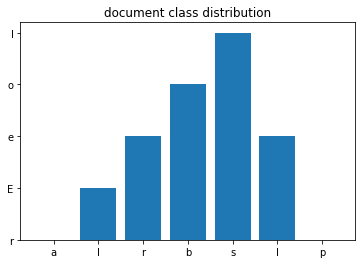

In [5]:
plt.bar([i[0] for i in doc_types],[i[1] for i in doc_types] )
plt.title('document class distribution')